In [1]:
import os

import rosbag
import rosbag_pandas
import numpy as np
import pandas as pd
import timeit

from pypeln import thread as th

In [2]:
BAG_FOLDER = '../data/'

In [3]:
files = os.listdir(BAG_FOLDER)
len(files)

100

In [4]:
def bag2df(file_name):
    df = None
    try:
        df = rosbag_pandas.bag_to_dataframe(BAG_FOLDER + file_name) 
    except TypeError:
        print(file_name)
    return df 

In [5]:
stage = th.map(bag2df, files, workers = 14)

data = list(stage)
print(len(data))

100


In [6]:
df = pd.concat(data)

In [7]:
import ipympl
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

x = df.pose__pose_position_x
y = df.pose__pose_position_y
z = df.pose__pose_position_z

In [8]:
%matplotlib notebook

In [9]:
X = np.arange(-5, 5, 0.5)
Y = np.arange(-5, 5, 0.5)

<IPython.core.display.Javascript object>


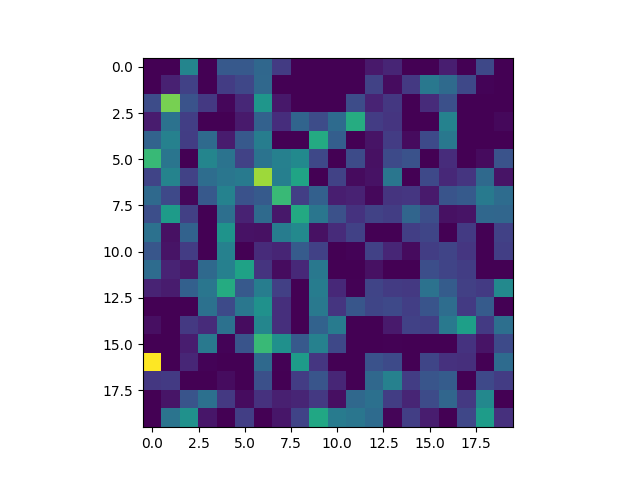

In [10]:
world = np.zeros((X.shape[0], Y.shape[0]))
fig = plt.figure()

plt.rcParams['figure.figsize'] = [8, 5]

for x_, y_ in zip(x,y):
    xi = np.digitize(x_, X) - 1
    yi = np.digitize(y_, Y) - 1
    world[xi, yi] += 1    
    
world /= len(x)
world = world.T
plt.imshow(world * 255)
plt.show()

In [17]:
Xm, Ym = np.meshgrid(X, Y)
Z = np.ones(Xm.shape)

In [12]:
world.shape, Xm.shape, Ym.shape

((20, 20), (20, 20), (20, 20))

In [27]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.colors as mcolors
import matplotlib

In [33]:
# fourth dimention - colormap
# create colormap according to x-value (can use any 50x50 array)
color_dimension = world # change to desired fourth dimension
minn, maxx = color_dimension.min(), color_dimension.max()
norm = matplotlib.colors.Normalize(minn, maxx)
m = plt.cm.ScalarMappable(norm=norm)
m.set_array([])
fcolors = m.to_rgba(color_dimension)

<IPython.core.display.Javascript object>


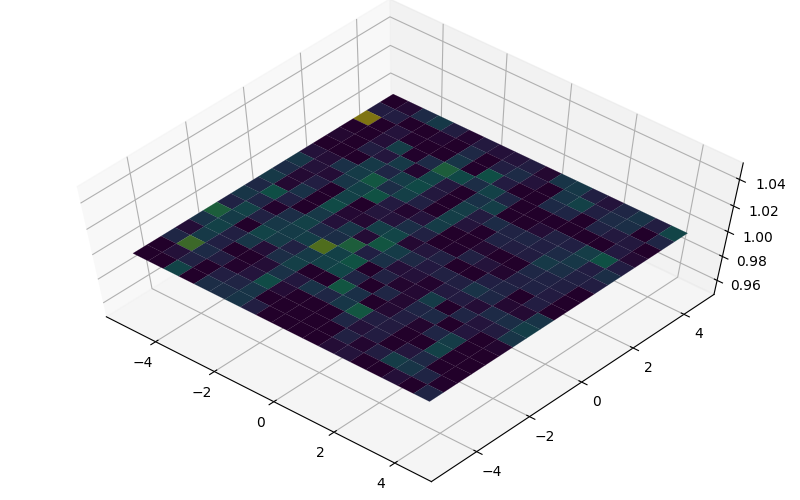

In [34]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(Xm, Ym, Z,  facecolors=fcolors, linewidth=0.1)
plt.show()

In [16]:
querry = '/home/francesco/Documents/krock-sim/krock/krock2_ros/map_generation/querry.npy'